In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt, pi, exp
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from scipy import integrate

## 1. Define Morse Potential Parameters

In [8]:
J_to_au = 2.294e17     # au per J
D_e_SI = 6.901e-19     # Equilibruim bond energy in J
D_e = D_e_SI*J_to_au   # Equilibrium bond energy in atomic units
print('Equilibrium bond energy: ', D_e)

m_to_au = 1.88973e10      # au per meter 
r0_SI = 9.109e-11         # Equilibrium bond length in m
r0 = r0_SI*m_to_au        # Equilibrium bond length in au
print('Equilibrium bond length: ', r0)

k = 1.039e3;                      # J per m^2
alpha_SI = sqrt(k/(2*D_e_SI))     # 1/m
alpha = alpha_SI*(1/m_to_au)      # 1/length au
print('alpha: ', alpha)    

hbar = 1      # Planck's constant in atomic unit

Equilibrium bond energy:  0.15830894
Equilibrium bond length:  1.721355057
alpha:  1.4519010006821158


## 2. Spatial Discretization

Energy Eigenvalues (eV) for n = 0 to 5:
-------------------------------------
n = 0: E = 0.26199+0.00000j eV
n = 1: E = 0.76130+0.00000j eV
n = 2: E = 1.22771+0.00000j eV
n = 3: E = 1.66125+0.00000j eV
n = 4: E = 2.06190+0.00000j eV
n = 5: E = 2.42969+0.00000j eV


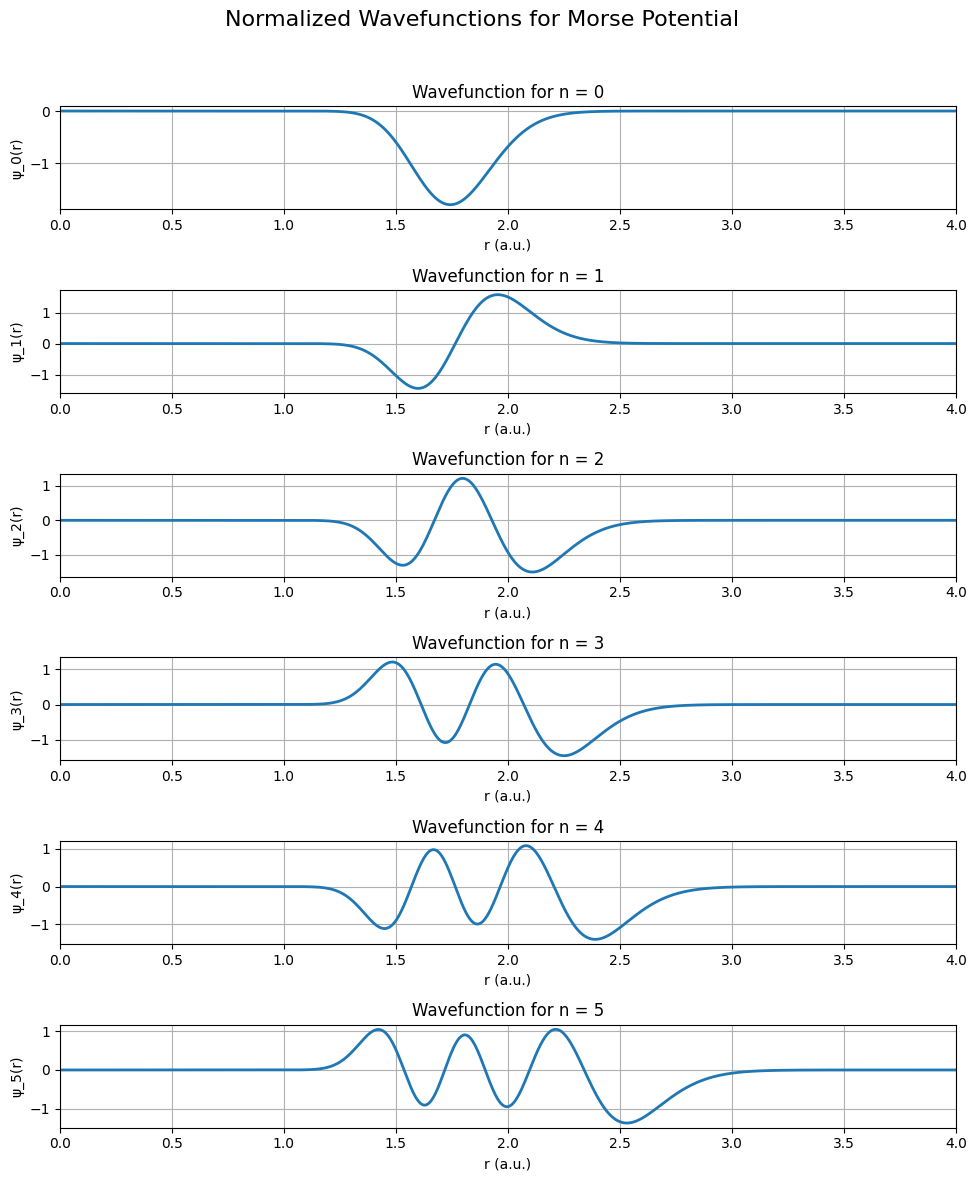

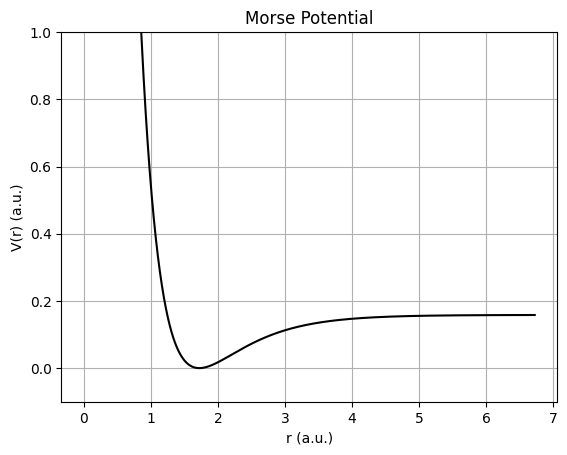

In [9]:
N = 2000                    # Number of spatial points
r_max = r0 + 5              # Maximum r value in a.u.
r = np.linspace(0, r_max, N)  # Discretized spatial domain
dr = r[1] - r[0]            # Spatial step size in a.u.

# 3. Construct the Morse Potential
V = D_e * (1 - np.exp(-alpha * (r - r0)))**2  # Morse potential in a.u.

# 4. Construct the Kinetic Energy Operator
mass = 1  # Mass in a.u. (for simplicity, using m_e)
m_H = 1.6735575e-27  # Mass of Hydrogen (kg)
m_F = 3.162e-26      # Mass of Fluorine (kg)
me = 9.10938356e-31  # Electron mass in kg

# Reduced mass for HF molecule (kg)
mass_SI = (m_H * m_F) / (m_H + m_F) 
mass = mass_SI / me  # Reduced mass for HF molecule in a.u.

# Kinetic energy operator using finite difference
diagonal = -2 * np.ones(N)
off_diagonal = np.ones(N - 1)
T = (-hbar / (2 * mass)) * diags([off_diagonal, diagonal, off_diagonal], [-1, 0, 1]).toarray() / dr**2

# 5. Assemble the Hamiltonian
H = T + np.diag(V)  # Hamiltonian is the sum of kinetic and potential energy operators

# 6. Solve the Eigenvalue Problem
num_eigen = 6  # Number of lowest eigenvalues to compute
E, psi = eigs(H, k=num_eigen, which='SM')  # Solve for eigenvalues and eigenvectors

# Convert eigenvalues from a.u. to eV
E_eV = E * 27.2114  # Convert to eV

# 7. Normalize the Wavefunctions
for n in range(num_eigen):
    psi[:, n] /= np.sqrt(integrate.simpson(np.abs(psi[:, n])**2, r))  # Normalize each wavefunction

# 8. Tabulate the Energy Eigenvalues
print('Energy Eigenvalues (eV) for n = 0 to 5:')
print('-------------------------------------')
for n in range(num_eigen):
    print(f'n = {n}: E = {E_eV[n]:.5f} eV')  # Use sorted eigenvalues

# 9. Plot the Corresponding Wavefunctions as Subplots
plt.figure(figsize=(10, 12))
for n in range(num_eigen):
    plt.subplot(num_eigen, 1, n + 1)  # Create a subplot for each wavefunction
    plt.plot(r, psi[:, n], linewidth=2)
    plt.xlim([0, 4])
    plt.xlabel('r (a.u.)')  # Change to Å if needed
    plt.ylabel(f'ψ_{n}(r)')  # Label for each wavefunction
    plt.title(f'Wavefunction for n = {n}')
    plt.grid()

plt.suptitle('Normalized Wavefunctions for Morse Potential', fontsize=16)  # Super title for the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for better visibility

# 10. Plot the Morse Potential for Reference
plt.figure()
plt.plot(r, V, 'k', linewidth=1.5)  # Plot potential in a.u.
plt.xlabel('r (a.u.)')  # Change to Å if needed
plt.ylabel('V(r) (a.u.)')
plt.title('Morse Potential')
plt.grid()
plt.ylim([-0.1, 1])
plt.show()